# Часть 1

## Этап 1

In [2]:
# импортируйте необходимые библиотеки для работы с данными и визуализацией

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

In [11]:
# загрузите датасет
df = pd.read_csv("uplift_fp_data.csv")

### Ознакомление с датасетом

In [ ]:
# Ознакомление с датасетом
df.head()

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,treatment,target
0,10,1,142.44,1,0,1,0,1,1,0
1,6,2,329.08,1,1,2,1,2,0,0
2,7,1,180.65,0,1,1,1,2,1,0
3,9,4,675.83,1,0,2,1,2,0,0
4,2,0,45.34,1,0,0,0,2,1,0


In [6]:
df.describe()

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,treatment,target
count,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000
mean,5.763734,1.481969,242.085656,0.551031,0.549719,0.748469,0.502250,1.319609,0.334172,0.146781
std,3.507592,1.544514,256.158608,0.497393,0.497526,0.697936,0.499999,0.678254,0.471704,0.353890
min,1.000000,0.000000,29.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,64.660000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,6.000000,1.000000,158.110000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,9.000000,2.000000,325.657500,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000
max,12.000000,6.000000,3345.930000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   recency          64000 non-null  int64  
 1   history_segment  64000 non-null  int64  
 2   history          64000 non-null  float64
 3   mens             64000 non-null  int64  
 4   womens           64000 non-null  int64  
 5   zip_code         64000 non-null  int64  
 6   newbie           64000 non-null  int64  
 7   channel          64000 non-null  int64  
 8   treatment        64000 non-null  int64  
 9   target           64000 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 4.9 MB


### заполните пропуски в датасете, если они есть
пропусков нет

In [11]:
df.isna().sum()

recency            0
history_segment    0
history            0
mens               0
womens             0
zip_code           0
newbie             0
channel            0
treatment          0
target             0
dtype: int64

### Выводы: 
Не было найдено пропусков в датасете  
Типы были приведены


## Этап 2

### EDA


#### Распределение целевой переменной между контрольной и тестовой группами

In [36]:
df_info_treatment = df.groupby('treatment', as_index=False).agg({'recency': 'count'}).rename(columns={'recency': 'count_treatment'})

df_info_treatment['percent'] = round(df_info_treatment['count_treatment'] / df.shape[0] * 100, 2)
df_info_treatment

,treatment,count_treatment,percent
0,0,42613,66.58
1,1,21387,33.42


In [41]:
df_info = df.groupby(['treatment', 'target'], as_index=False).agg({'recency': 'count'}).rename(columns={'recency': 'count'})
df_info = df_info.merge(
    df_info_treatment[['treatment', 'count_treatment']],
    on=['treatment']
)
df_info['percent'] = round(df_info['count'] / df.shape[0] * 100, 2)
df_info['percent_in_group'] = round(df_info['count'] / df_info['count_treatment'] * 100, 2)
df_info

,treatment,target,count,count_treatment,percent,percent_in_group
0,0,0,36457,42613,56.96,85.55
1,0,1,6156,42613,9.62,14.45
2,1,0,18149,21387,28.36,84.86
3,1,1,3238,21387,5.06,15.14


In [ ]:
df_info_2 = df.groupby('target').agg({'recency': 'count'}).rename(columns={'recency': 'count'})

df_info_2['percent'] = round(df_info_2['count'] / df.shape[0] * 100, 2)
df_info_2

,count,percent
target,,
0,54606,85.32
1,9394,14.68


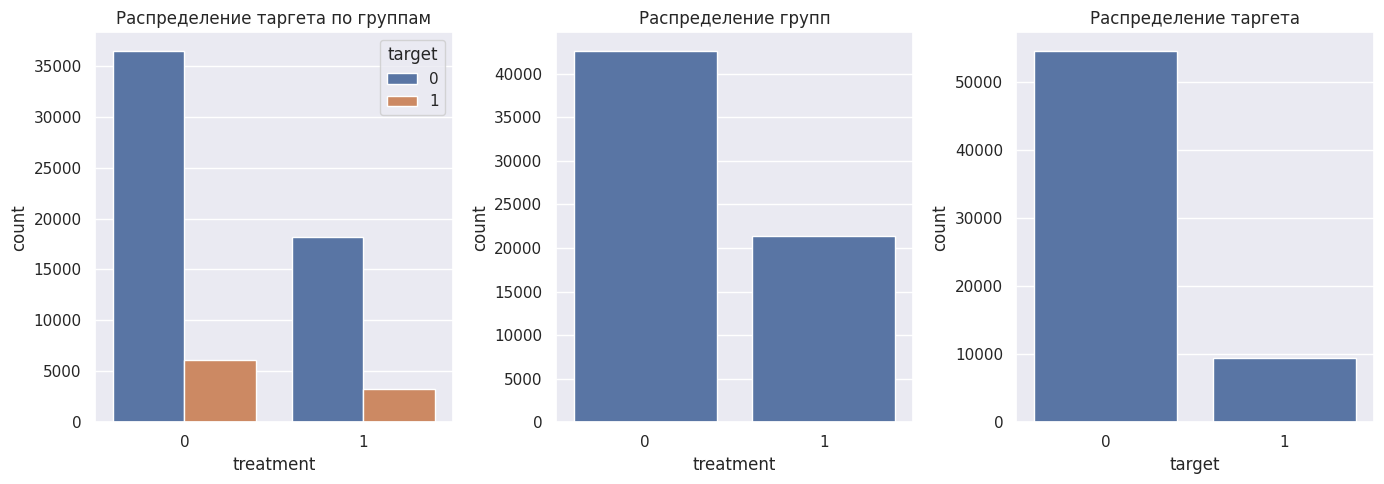

In [27]:
# Создаем фигуру с 2 подграфиками (1 ряд, 2 колонки)
fig, axes = plt.subplots(1, 3, figsize=(14, 5))

# Первый график: распределение таргета по группам
sns.countplot(
    data=df, 
    x='treatment',
    hue='target',
    ax=axes[0]
)
axes[0].set_title('Распределение таргета по группам')

# Второй график: распределение групп
sns.countplot(
    data=df, 
    x='treatment',
    ax=axes[1]
)
axes[1].set_title('Распределение групп')

# Третий график: распределение таргета
sns.countplot(
    data=df, 
    x='target',
    ax=axes[2]
)
axes[2].set_title('Распределение таргета')

# Немного подправим оформление
plt.tight_layout()
plt.show()

Сделайте вывод на основе EDA в данной ячейке

#### Вывод:
1) Контрольная группа почти в два раза больше тестовой - 42 613 (66.58%) клиентов против 21 387 (33.42%). Дисбаланс существенный, но выборка достаточно большая, чтобы строить статистически значимые выводы. При моделировании нужно учитывать этот факт.  
2) Основная масса клиентов в обеих группах не воспользовалась промо target = 0. В тестовой группе доля откликов среди тех, кто получил промо, визуально выше, чем в контрольной. Это предварительно подтверждает наличие uplift-эффекта.

Промежуточный вывод:  
Датасет содержит несбалансированные группы и низкую базовую конверсию, однако визуальный анализ указывает на положительный эффект промо. Для корректной оценки uplift-эффекта необходимо учитывать дисбаланс и подтвердить результаты статистическими методами.

# Этап 2

### Проверка на статистическую значимость

Обоснуйте выбор статистического теста в данной ячейке

2 независимые группы + большие выборки, буду использовать z-тест для двух пропорций

In [50]:
df_info

,treatment,target,count,count_treatment,percent,percent_in_group
0,0,0,36457,42613,56.96,85.55
1,0,1,6156,42613,9.62,14.45
2,1,0,18149,21387,28.36,84.86
3,1,1,3238,21387,5.06,15.14


In [ ]:
cr_0 = df_info.query("treatment == 0 and target == 1")['percent_in_group'].item()
cr_1 = df_info.query("treatment == 1 and target == 1")['percent_in_group'].item()

print(f"Контрольная группа: cr = {cr_0}% \nТестовая группа: cr = {cr_1}% \nРазница: {round(cr_1 - cr_0, 2)%}")

Контрольная группа: cr = 14.45 
Тестовая группа: cr = 15.14 
Разница: 0.69


In [ ]:
from statsmodels.stats.proportion import proportions_ztest


# Считаем количество откликов (target=1) и размер каждой группы
treatment_counts = df.groupby('treatment')['target'].sum().values  # [кол-во откликов в контрольной, кол-во в тестовой]
treatment_sizes = df.groupby('treatment')['target'].count().values  # [размер контрольной, размер тестовой]

# Проводим z-тест для двух пропорций
z_stat, p_value = proportions_ztest(count=treatment_counts, nobs=treatment_sizes)

print(f"Z-статистика: {z_stat:.4f}")
print(f"P-значение: {p_value:.4f}")
z_stat, p_value = proportions_ztest(count=treatment_counts, nobs=treatment_sizes)
print(f"Различия между группами стистически{' НЕ ' if p_value > 0.05 else ' '}значимы")

Z-статистика: -2.3393
P-значение: 0.0193
Различия между группами стистически значимы


## Построение корреляций

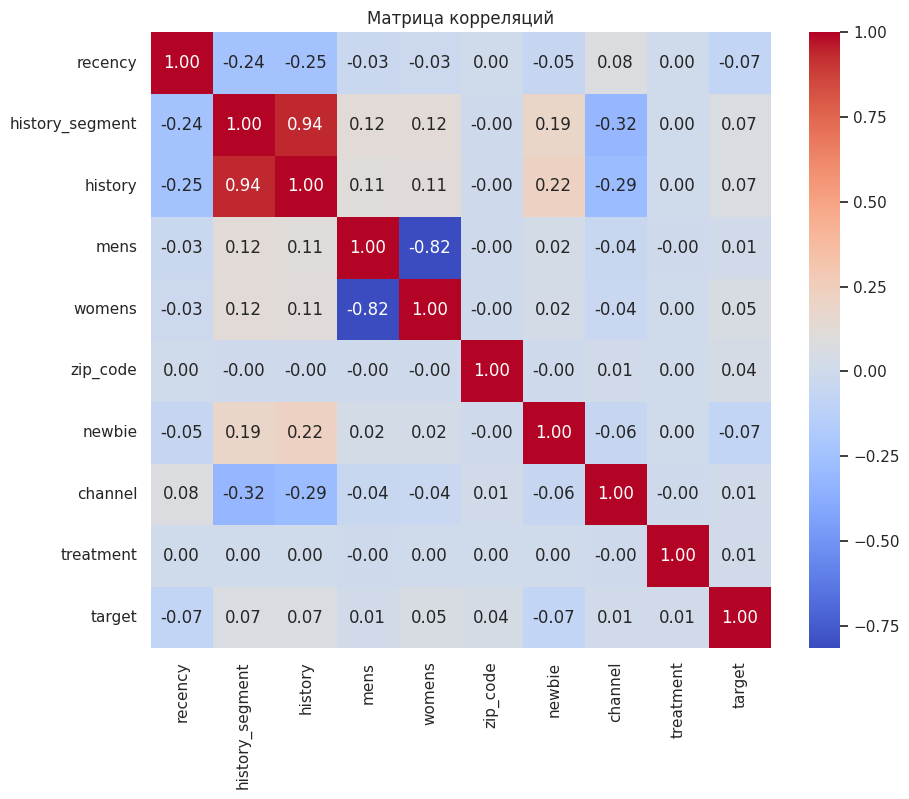

In [61]:
# Вычисляем матрицу корреляций
corr_matrix = df.corr() 

# Визуализируем
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Матрица корреляций")
plt.show()

Сделайте вывод о корреляциях признаков друг с другом и таргетом в этой ячейке

1) Сильные взаимосвязи между признаками:   
    Наблюдаются очень сильные корреляции между некоторыми входными признаками, что указывает на мультиколлинеарность: 
    - history_segment и history корреляция 0.94. Эти признаки почти полностью дублируют друг друга. В моделировании достаточно оставить только один из них, чтобы избежать избыточности и нестабильности оценок.
    - mens и womens: Корреляция -0.82. Наблюдается сильная отрицательная корреляция -0.82 между индикатором покупок мужских товаров и индикатором покупок женских товаров. Большинство клиентов, которые покупали товары для мужчин, не покупали товары для женщин, и наоборот. Это указывает на четкое разделение клиентов по половым предпочтениям.
 
2) Взаимосвязь с целевым показателем:
    - Целевой показатель имеет очень низкие корреляции со всеми остальными признаками. Самые сильные корреляции по модулю 0.07. Линейная зависимость между отдельными признаками и фактом использования промокода чрезвычайно слаба. Для успешного прогнозирования target потребуется использовать нелинейные модели, способные улавливать сложные взаимодействия признаков.

3) Данные не сбалансированы 

4) Корреляции между treatment и другими признаками не наблюдается. Вероятность попадания в тестовую группу НЕ зависит от признаков объекта, то есть определяется случайным образом.

5) Конверсия в целевое действие достаточно низкая 14-15%

## Этап 3

Обоснуйте выбор конкретной uplift модели в данной ячейке

<!-- Несбалансированные данные - серьёзная проблема для S-learner и T-learner, поэтому не берем их. 

Наблюдается очень слабая линейная корреляция признаков с целевым показателем, линейные методы не подойдут. 

В качестве бейзлайна возьмем UpliftRandomForestClassifier
Возьмем модель *X-learner* из *causalml* -->

В качестве бейзлайна буду брать простой подход: S-learner на основе RandomForestClassifier  
В качестве первой модели буду использовать T-learner на основе RandomForestClassifier, более продвинутый метод  
В качестве второй модели буду использовать X-learner на основе XGBClassifier, XGBRegressor, так как подходит для не сбалансированых данных  


### Советы по обучению и инференсу моделей
1. Некоторые uplift модели из библиотеки `causalml` будут требовать категориальные значения воздействия. Для этого используйте маппинг
#### Пример использования маппинга
```python
treatment_mapping = {
    0: 'control',
    1: 'treatment'
}
treatment_train_mapped = treatment_train.map(treatment_mapping)
treatment_test_mapped = treatment_test.map(treatment_mapping)
```

2. При вызове метода `.predict` и получения метрик для тестовой выборки не забывайте применять к прогнозам метод `squeeze()`, чтобы преобразовать многомерный массив в одномерный, что поможет получить адекватные метрики.

3. Для воспроизводимости результатов и объективной оценки не забывайте применять `random_state=42` для моделей, а также при разделении выборки

### Разбиение выборки на тренировочную и тестовую

In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from causalml.inference.meta import (
    BaseTClassifier,
    BaseSClassifier
)

# Для метрик Uplift
from sklift.metrics import uplift_auc_score, qini_auc_score, uplift_at_k

import matplotlib.pyplot as plt
import seaborn as sns

# загрузите датасет
df = pd.read_csv("uplift_fp_data.csv")

In [39]:
df.head()

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,treatment,target
0,10,1,142.44,1,0,1,0,1,1,0
1,6,2,329.08,1,1,2,1,2,0,0
2,7,1,180.65,0,1,1,1,2,1,0
3,9,4,675.83,1,0,2,1,2,0,0
4,2,0,45.34,1,0,0,0,2,1,0


In [40]:
# Разбить данные на тренировочную и тестовую выборки с учётом стратификации по воздействию и таргету
# в соотношени 80% на 20% (не забывайте про random_state=42)

RANDOM_STATE = 42
TEST_SIZE = 0.2
columns_to_drop = ['history', 'mens']
K = 0.30
UPLIFT_NAME = f"Uplift@{K*100}%"
RESULT = {
    'Model': [],
    'Uplift AUC': [],
    'Qini AUC': [],
    UPLIFT_NAME: []
}


# разделим данные на признаки и целевую переменную
X = df.drop(columns_to_drop + ['target'], axis=1) 
W = df['treatment']
y = df['target']  # целевая переменная (например, количество поездок)

# Разделим данные на обучающую и тестовую выборки
X_train_full, X_test_full, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=TEST_SIZE, 
    stratify=df[['target', 'treatment']],
    random_state=RANDOM_STATE
)

# Разделяем X_train_full и X_test_full на признаки и переменную treatment
W_train = X_train_full['treatment']
X_train = X_train_full.drop(columns=['treatment'])
W_test = X_test_full['treatment']
X_test = X_test_full.drop(columns=['treatment'])

treatment_mapping = {
    0: 'control',
    1: 'treatment'
}

W_train_str = W_train.map(treatment_mapping)
W_test_str = W_test.map(treatment_mapping)

# Проверяем размеры
print(f"Размер обучающей выборки X_train: {X_train.shape}")
print(f"Размер тестовой выборки X_test: {X_test.shape}")

Размер обучающей выборки X_train: (51200, 6)
Размер тестовой выборки X_test: (12800, 6)


### Обучение выбранного бейзлайна


In [41]:

BASE_RF_PARAMS = {
    'n_estimators': 100,
    'max_depth': 6,
    'random_state': RANDOM_STATE,
    'verbose': 1
}


# обучим модель RandomForestClassifier
learner = RandomForestClassifier(**BASE_RF_PARAMS)

# инициализация S-learner модели
s_learner = BaseSClassifier(
    learner=learner, # Базовая модель (в данном случае случайный лес)
    control_name=0,  # Значение признака treatment для контрольной группы
)

# обучаем S-learner
s_learner.fit(X_train_full.values, treatment=W_train.values, y=y_train.values)


# получаем предсказания uplift для тестовой выборки
uplift_vals = s_learner.predict(np.array(X_test_full.values.copy())).squeeze()

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


### Расчет метрик для выбранного бейзлайна на тестовой выборке

Обучить baseline выбранной модели, получить метрики uplift: AUC, Qini AUC, Uplift@30%

In [42]:
# теперь можно оценить качество модели с помощью uplift-метрик
uplift_score = uplift_auc_score(
    y_true=y_test.values, 
    uplift=uplift_vals.squeeze(), 
    treatment=W_test.values
)
qini_score = qini_auc_score(
    y_true=y_test.values, 
    uplift=uplift_vals.squeeze(), 
    treatment=W_test.values
)
u_at_30   = uplift_at_k(
    y_true=y_test.values,
    uplift=uplift_vals.squeeze(),
    treatment=W_test.values,
    strategy="overall",
    k=K
)

print(f"Uplift AUC: {uplift_score:.4f}")
print(f"Qini AUC: {qini_score:.4f}")
print(f"{UPLIFT_NAME}: {u_at_30:.4f}")

# Добавим метрики в словарь с результатами 
RESULT['Model'].append('S-learner')
RESULT['Uplift AUC'].append(f"{uplift_score:.4f}")
RESULT['Qini AUC'].append(f"{qini_score:.4f}")
RESULT[UPLIFT_NAME].append(f"{u_at_30:.4f}")

Uplift AUC: 0.0254
Qini AUC: 0.0562
Uplift@30.0%: 0.0384


# Обучение 2 моделей 

### Обучение модели 1

In [43]:
# создаём базовые модели для тестовой и контрольной групп 
treatment_model = RandomForestClassifier(
    **BASE_RF_PARAMS
)

control_model = RandomForestClassifier(
    **BASE_RF_PARAMS
)


# инициализируем T-learner
t_learner = BaseTClassifier(
    treatment_learner=treatment_model,
    control_learner=control_model,
    control_name=0,  # название контрольной группы в столбце treatment
)

# обучаем T-learner
# примечание: X_train должен иметь столбец 'treatment' со значениями 'treatment' и 'control'
t_learner.fit(
    X=X_train.drop(columns=['treatment'], errors='ignore'),  # Признаки без столбца treatment
    treatment=W_train.values,       # Столбец с признаком воздействия
    y=y_train.values                            # Целевая переменная
)

# получаем предсказания для тестовой выборки
uplift_pred = t_learner.predict(X_test.drop(columns=['treatment'], errors='ignore'))


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished
/home/mle-user/env_uplift/lib/python3.10/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
/home/mle-user/env_uplift/lib/python3.10/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


### Получение метрик по модели 1

In [44]:
# теперь можно оценить качество модели с помощью uplift-метрик
uplift_score = uplift_auc_score(
    y_true=y_test.values, 
    uplift=uplift_pred.squeeze(), 
    treatment=W_test.values
)
qini_score = qini_auc_score(
    y_true=y_test.values, 
    uplift=uplift_pred.squeeze(), 
    treatment=W_test.values
)
u_at_30   = uplift_at_k(
    y_true=y_test.values,
    uplift=uplift_pred.squeeze(),
    treatment=W_test.values,
    strategy="overall",
    k=K
)

print(f"Uplift AUC: {uplift_score:.4f}")
print(f"Qini AUC: {qini_score:.4f}")
print(f"{UPLIFT_NAME}: {u_at_30:.4f}")

# Добавим метрики в словарь с результатами 
RESULT['Model'].append('T-learner')
RESULT['Uplift AUC'].append(f"{uplift_score:.4f}")
RESULT['Qini AUC'].append(f"{qini_score:.4f}")
RESULT[UPLIFT_NAME].append(f"{u_at_30:.4f}")

Uplift AUC: 0.0248
Qini AUC: 0.0554
Uplift@30.0%: 0.0366


### Обучение модели 2

In [45]:
from causalml.inference.meta import BaseXClassifier
from xgboost import XGBClassifier, XGBRegressor

propensity_model = XGBClassifier(
    random_state=42,
    n_estimators=100,
    max_depth=4,
)

# обучение propensity-модели на обучающей выборке
propensity_model.fit(X_train.values, y_train)

# получаем propensity score для train и test
p_train = propensity_model.predict_proba(X_train.values)[:, 1]
p_test = propensity_model.predict_proba(X_test.values)[:, 1]

BASE_XGB_PARAMS = {
    'random_state': RANDOM_STATE,
    'n_estimators': 100,
    'max_depth': 6,
    'n_jobs': -1
}

xgb_clf = XGBClassifier(**BASE_XGB_PARAMS)
xgb_reg = XGBRegressor(**BASE_XGB_PARAMS)

x_learner = BaseXClassifier(
    outcome_learner=xgb_clf,
    control_name=0,
    effect_learner=xgb_reg,
)

# обучаем X-learner с передачей propensity score
x_learner.fit(
    X=X_train_full.values,
    treatment=W_train.values,
    y=y_train.values,
    p=p_train,
)

uplift_pred = x_learner.predict(
    X_test_full.values,
    treatment=W_test.values,
    p=p_test
)


### Получение метрик по модели 2

In [46]:
# теперь можно оценить качество модели с помощью uplift-метрик
uplift_score = uplift_auc_score(
    y_true=y_test.values, 
    uplift=uplift_pred.squeeze(), 
    treatment=W_test.values
)
qini_score = qini_auc_score(
    y_true=y_test.values, 
    uplift=uplift_pred.squeeze(), 
    treatment=W_test.values
)
u_at_30   = uplift_at_k(
    y_true=y_test.values,
    uplift=uplift_pred.squeeze(),
    treatment=W_test.values,
    strategy="overall",
    k=K
)

print(f"Uplift AUC: {uplift_score:.4f}")
print(f"Qini AUC: {qini_score:.4f}")
print(f"{UPLIFT_NAME}: {u_at_30:.4f}")

# Добавим метрики в словарь с результатами 
RESULT['Model'].append('X-learner')
RESULT['Uplift AUC'].append(f"{uplift_score:.4f}")
RESULT['Qini AUC'].append(f"{qini_score:.4f}")
RESULT[UPLIFT_NAME].append(f"{u_at_30:.4f}")

Uplift AUC: 0.0092
Qini AUC: 0.0213
Uplift@30.0%: 0.0232


In [47]:
pd.DataFrame(RESULT)

,Model,Uplift AUC,Qini AUC,Uplift@30.0%
0,S-learner,0.0254,0.0562,0.0384
1,T-learner,0.0248,0.0554,0.0366
2,X-learner,0.0092,0.0213,0.0232


Наилучшая модель - S-learner [Qini AUC (0.0562) и Uplift@30.0% (0.0384)]. S-learner лучше всего ранжирует клиентов по потенциалу роста и дает максимальный фактический uplift среди 30% самых перспективных клиентов.  
T-learner имеет метрики, очень близкие к S-learner, но немного ниже по всем показателям.  
X-learner показал наихудшие результаты по всем метрикам, с Qini AUC (0.0213) и Uplift@30.0% (0.0232) значительно ниже, чем у S- и T-learner.  

# Часть 2

## Этап 1
Улучшите бейзлайн выбранной модели

#### Генерация признаков (опционально)

### Подбор гиперпараметров

In [ ]:
from optuna import create_study
from sklift.metrics import uplift_at_k

def objective(trial):
    # Дополните код для подбора гиперпараметров

    uplift_at_30 = uplift_at_k(y_test, uplift_pred, treatment_test, k=0.3, strategy='overall')
    return uplift_at_30

# Создаем и запускаем исследование
study = create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Выводим лучшие гиперпараметры
print("Best hyperparameters: ", study.best_params)
print("Best score: ", study.best_value)


## Этап 2

### Визуализация результатов

In [ ]:
from utils import custom_uplift_by_percentile

В данной ячейке сделайте вывод о качестве работы модели и проинтерпретируйте график `uplift by percentile` 

# Этап 3

In [138]:
# Класс для инференса модели
class UpliftModelInference:
    """
    Класс для инференса uplift модели.
    """
    
    def __init__(self, model, feature_names, logger=None):
        """
        Инициализация класса.
        
        Аргументы:
            model: Обученная модель uplift
            feature_names: Список признаков для предсказания 
            logger: Объект для логирования (по умолчанию None)
        """
        self.model = model
        self.feature_names = ['recency', 'history_segment', 'history', 'mens', 'womens', 'zip_code', 'newbie', 'channel']
        self.logger = logger
        
        if self.logger:
            self.logger.info("Модель UpliftModel инициализирована с признаками: %s", feature_names)

    def _transform_data(self, X):
        """
        Преобразование данных для модели.
        
        Аргументы:
            X: pandas.DataFrame с признаками
        """
        if self.logger:
            self.logger.debug("Преобразование входных данных размерности %s", X.shape)

        # реализуйте преобразование данных для модели,
        # если в финальной модели используются новые признаки
       

        return X
    
    def predict(self, X):
        """
        Получение предсказаний uplift.
        
        Аргументы:
            X: pandas.DataFrame с признаками
            
        Возвращает:
            numpy.array с предсказанными значениями uplift
        """
        # Проверяем, что датафрейм не пустой
        if X.empty:
            if self.logger:
                self.logger.error("Предоставлен пустой датафрейм")
            return None
            
        # Проверяем наличие пропущенных значений
        if X.isnull().any().any():
            if self.logger:
                self.logger.error("Входные данные содержат пропущенные значения")
            return [None]*len(X)
        
        if self.logger:
            self.logger.info("Выполняем предсказания для данных размерности %s", X.shape)

        # Проверяем наличие всех необходимых признаков
        missing_features = set(self.feature_names) - set(X.columns)
        if missing_features:
            error_msg = f"Отсутствуют признаки: {missing_features}"
            if self.logger:
                self.logger.error(error_msg)

            return [None]*len(X)
        
        # Преобразуем данные для модели
        if self.logger:
            self.logger.debug("Начинаем преобразование данных")
        X = self._transform_data(X)
        
        # Вычисляем uplift
        if self.logger:
            self.logger.debug("Выполняем предсказания модели")
        

        # Дополните код для получения предсказаний аплифта

        
        if self.logger:
            self.logger.info("Предсказания успешно завершены")
            
        return uplift


In [126]:
model = UpliftModelInference(model= # ваш код,
                             feature_names= # ваш код)

In [ ]:
test_data = pd.DataFrame({
            'recency': [1, 2, 3],
            'history_segment': [1, 2, 3], 
            'history': [100, 200, 300],
            'mens': [1, 0, 1],
            'womens': [0, 1, 0],
            'zip_code': [1, 0, 1],
            'newbie': [0, 1, 0],
            'channel': [1, 2, 0]
        })

In [ ]:
# проверка работы класса
model.predict(test_data)